In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Data: Handwritten digits (8x8 small images)

In [2]:
digits = load_digits()
X_images = digits.images          # shape (n_samples, 8, 8)
y_images = digits.target          # integer labels 0–9

print("✅ Image dataset loaded successfully!")
print("Images shape:", X_images.shape)
print("Sample image shape:", X_images[0].shape)
print("Unique classes:", np.unique(y_images))
print("Pixel intensity range:", X_images.min(), "→", X_images.max())

# Flatten for DataFrame representation
df_images = pd.DataFrame(digits.data)
df_images['target'] = y_images
display(df_images.describe())

✅ Image dataset loaded successfully!
Images shape: (1797, 8, 8)
Sample image shape: (8, 8)
Unique classes: [0 1 2 3 4 5 6 7 8 9]
Pixel intensity range: 0.0 → 16.0


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [3]:
# Quick sanity-preview
print("Shape of image array:", X_images.shape)
print("Number of samples:", len(X_images))
print("Image dimensions:", X_images[0].shape)
print("Unique classes:", np.unique(y_images))
print("Sample pixel range:", X_images.min(), "→", X_images.max())

# Check basic DataFrame summary (flattened)
display(df_images.describe())

Shape of image array: (1797, 8, 8)
Number of samples: 1797
Image dimensions: (8, 8)
Unique classes: [0 1 2 3 4 5 6 7 8 9]
Sample pixel range: 0.0 → 16.0


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


This gives quick metadata: shape, pixel intensity range (0–16 for digits), and overall numeric summary.

## Visualize Sample Images
This helps ensure data is loaded correctly and labels correspond to the visual content.

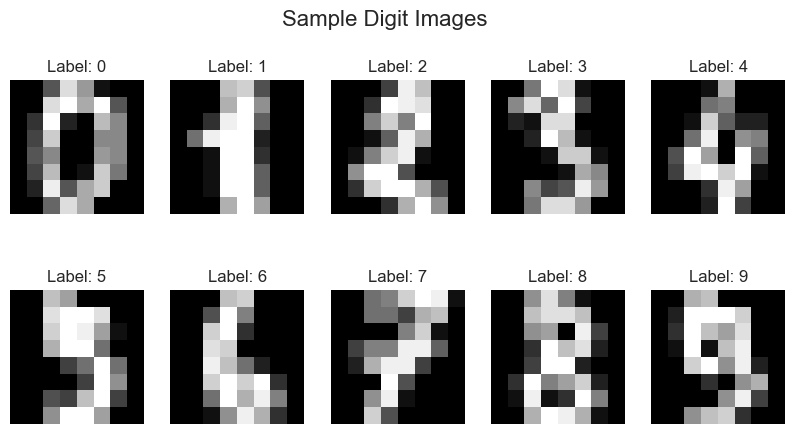

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_images[i], cmap='gray')
    ax.set_title(f"Label: {y_images[i]}")
    ax.axis('off')
plt.suptitle("Sample Digit Images", fontsize=16)
plt.show()

## Pixel Intensity Distribution
Shows how light/dark the digits are.
For normalized models, you’d scale this to [0,1] later — but EDA helps visualize raw brightness spread first.

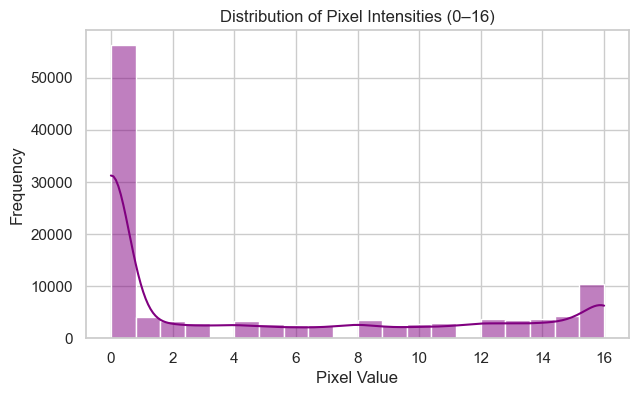

In [5]:
plt.figure(figsize=(7,4))
sns.histplot(X_images.ravel(), bins=20, kde=True, color='purple')
plt.title("Distribution of Pixel Intensities (0–16)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## Class Balance Check

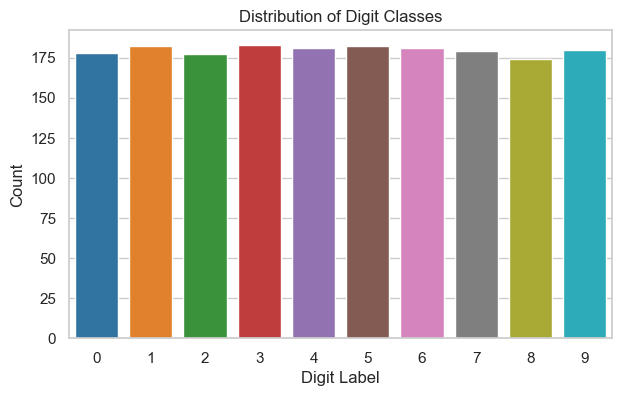

In [6]:
plt.figure(figsize=(7,4))
sns.countplot(x=y_images, palette='tab10')
plt.title("Distribution of Digit Classes")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

## Per-Class Mean Image (Feature Intuition)

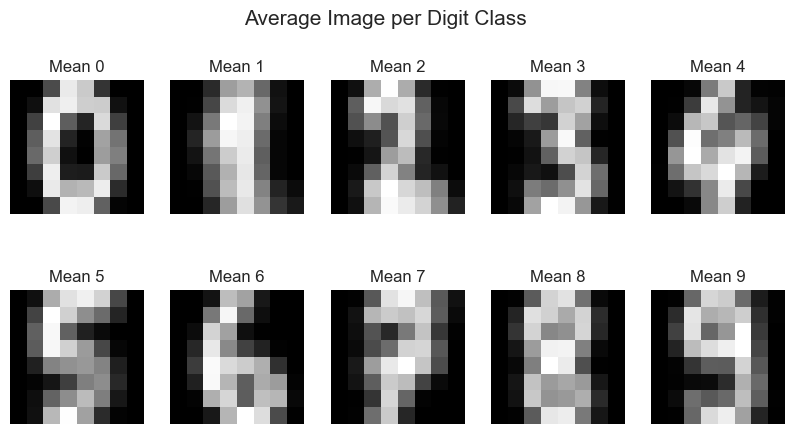

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for digit, ax in enumerate(axes.flat):
    mean_img = X_images[y_images == digit].mean(axis=0)
    ax.imshow(mean_img, cmap='gray')
    ax.set_title(f"Mean {digit}")
    ax.axis('off')
plt.suptitle("Average Image per Digit Class", fontsize=15)
plt.show()

## Pixel Correlation with Target

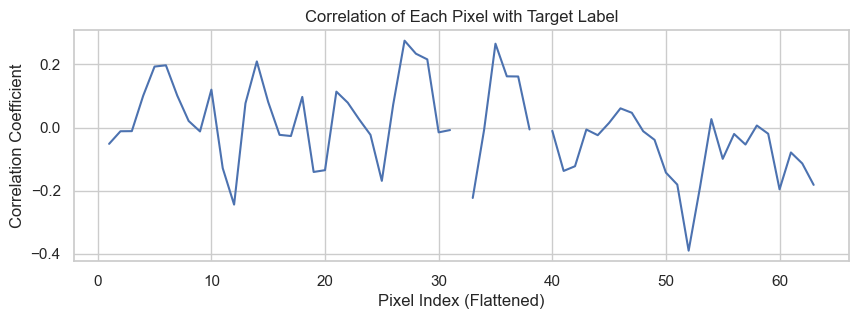

In [8]:
corrs = df_images.corr()['target'].drop('target')
plt.figure(figsize=(10,3))
plt.plot(corrs.values)
plt.title("Correlation of Each Pixel with Target Label")
plt.xlabel("Pixel Index (Flattened)")
plt.ylabel("Correlation Coefficient")
plt.show()

Some pixel positions (edges, corners) contribute very little — helps in feature selection or dimensionality reduction.

## Dimensionality Reduction Visualization (PCA)

We’ll visually check if PCA can reveal digit clusters — this shows how separable your raw data is.

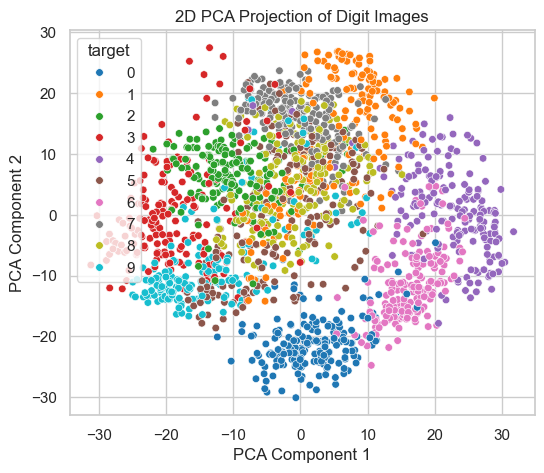

Explained variance by PCA (2 components): 0.285


In [9]:
X_flat = df_images.drop(columns='target')
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_flat)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_images['target'], palette='tab10', s=30)
plt.title("2D PCA Projection of Digit Images")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

print("Explained variance by PCA (2 components):", np.sum(pca.explained_variance_ratio_).round(3))

If digits cluster distinctly, your dataset is clean and class separation is strong — a sign your preprocessing is effective.

## Dimensionality Reduction (t-SNE)

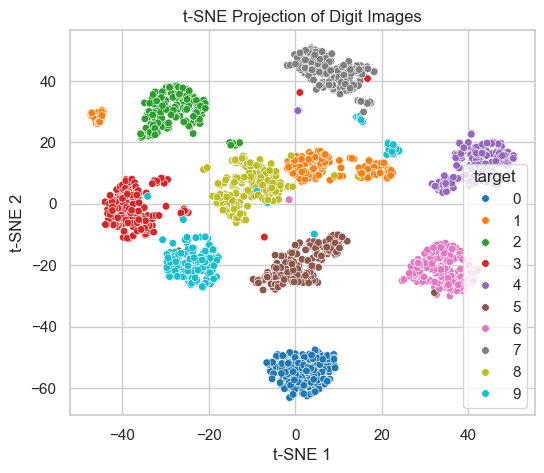

In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_flat)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_images['target'], palette='tab10', s=30)
plt.title("t-SNE Projection of Digit Images")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

## Clustering Insight (K-Means)

K-Means clustering completed. Silhouette Score: 0.136


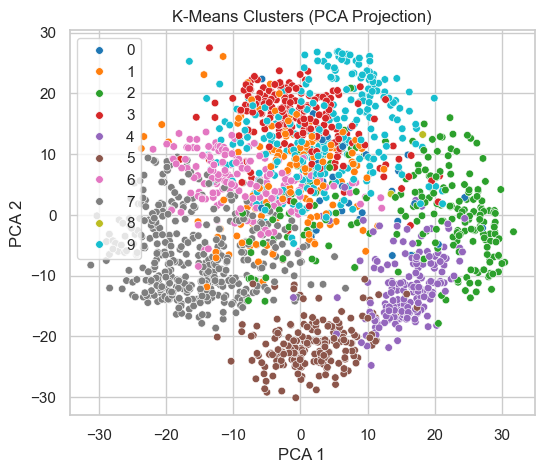

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

kmeans = KMeans(n_clusters=10, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)

sil_score = silhouette_score(X_scaled, labels_km)
print(f"K-Means clustering completed. Silhouette Score: {sil_score:.3f}")

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_km, palette='tab10', s=30)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## Baseline Classification (Logistic Regression)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y_images, test_size=0.2, random_state=42, stratify=y_images
)

clf = LogisticRegression(max_iter=2000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Baseline Classification Accuracy:", clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Baseline Classification Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

